**bold text**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [ ]:
# Load the dataset
df = pd.read_csv('/content/drive/MyDrive/Classification Task/riceClassification.csv')

In [ ]:
# Exploratory Data Analysis
print("Dataset Head:\n", df.head())
print("Dataset Info:\n", df.info())
print("Class Distribution:\n", df['Class'].value_counts())

Dataset Head:
    id  Area  MajorAxisLength  MinorAxisLength  Eccentricity  ConvexArea  \
0   1  4537        92.229316        64.012769      0.719916        4677   
1   2  2872        74.691881        51.400454      0.725553        3015   
2   3  3048        76.293164        52.043491      0.731211        3132   
3   4  3073        77.033628        51.928487      0.738639        3157   
4   5  3693        85.124785        56.374021      0.749282        3802   

   EquivDiameter    Extent  Perimeter  Roundness  AspectRation  Class  
0      76.004525  0.657536    273.085   0.764510      1.440796      1  
1      60.471018  0.713009    208.317   0.831658      1.453137      1  
2      62.296341  0.759153    210.012   0.868434      1.465950      1  
3      62.551300  0.783529    210.657   0.870203      1.483456      1  
4      68.571668  0.769375    230.332   0.874743      1.510000      1  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18185 entries, 0 to 18184
Data columns (total 12 col

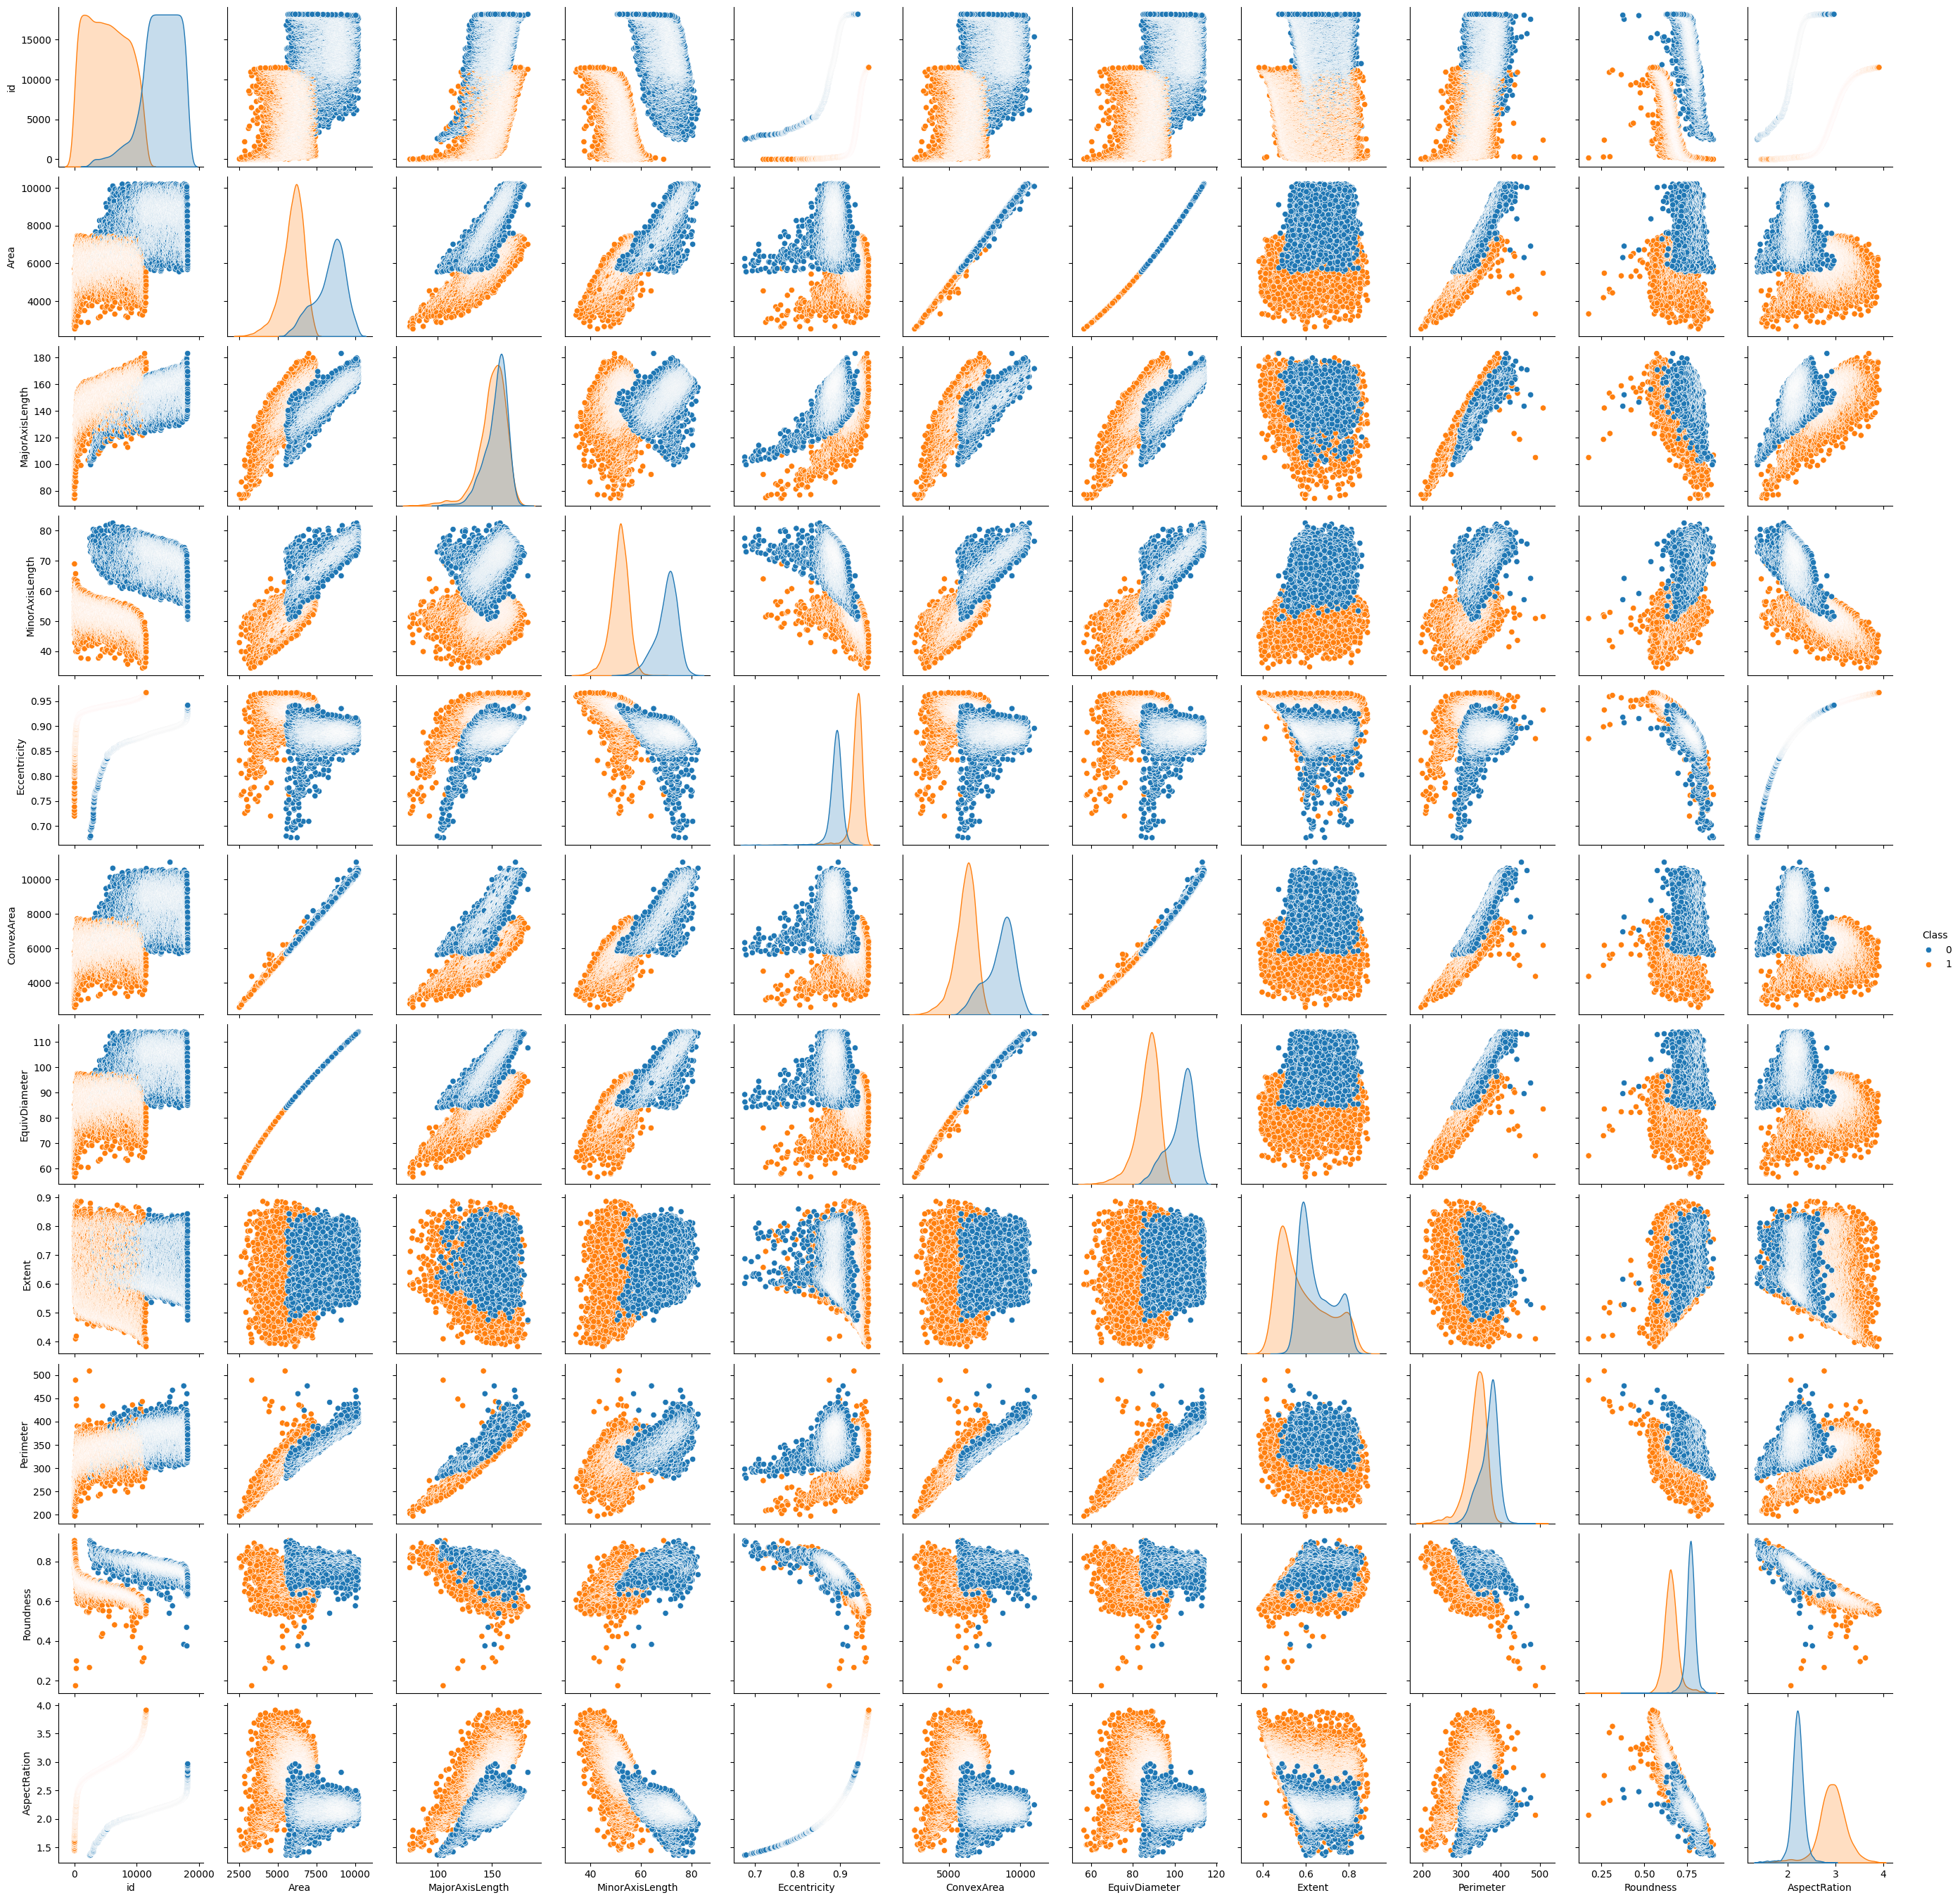

In [ ]:
# Visualizations
sns.pairplot(df, hue='Class')
plt.show()

In [ ]:
# Splitting the dataset
X = df.drop(columns=['Class'])
y = df['Class']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [ ]:
# Feature Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
# Logistic Regression from Scratch
class LogisticRegressionScratch:
    def __init__(self, learning_rate=0.01, epochs=1000):
        self.learning_rate = learning_rate
        self.epochs = epochs

    def sigmoid(self, z):
        return 1 / (1 + np.exp(-z))

    def fit(self, X, y):
        self.theta = np.zeros(X.shape[1])
        for _ in range(self.epochs):
            z = np.dot(X, self.theta)
            predictions = self.sigmoid(z)
            gradient = np.dot(X.T, (predictions - y)) / y.size
            self.theta -= self.learning_rate * gradient

    def predict(self, X):
        return (self.sigmoid(np.dot(X, self.theta)) >= 0.5).astype(int)

In [ ]:
# Train logistic regression from scratch
log_reg_scratch = LogisticRegressionScratch()
log_reg_scratch.fit(X_train_scaled, y_train)
y_pred_scratch = log_reg_scratch.predict(X_test_scaled)
accuracy_scratch = accuracy_score(y_test, y_pred_scratch)
print("Accuracy (Logistic Regression from Scratch):", accuracy_scratch)

Accuracy (Logistic Regression from Scratch): 0.9983502886994776


In [ ]:
# Model 1: Logistic Regression (Sklearn)
log_reg = LogisticRegression()
log_reg.fit(X_train_scaled, y_train)
y_pred_log_reg = log_reg.predict(X_test_scaled)
accuracy_log_reg = accuracy_score(y_test, y_pred_log_reg)
print("Accuracy (Logistic Regression - Sklearn):", accuracy_log_reg)


Accuracy (Logistic Regression - Sklearn): 1.0


In [ ]:
# Model 2: Random Forest Classifier
rf = RandomForestClassifier()
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print("Accuracy (Random Forest):", accuracy_rf)

Accuracy (Random Forest): 1.0


In [ ]:
# Compare models
best_model = "Logistic Regression - Sklearn" if accuracy_log_reg > accuracy_rf else "Random Forest"
print(f"Best Model: {best_model}")

Best Model: Random Forest


In [ ]:
# Hyper-parameter tuning
param_grid = {'n_estimators': [50, 100, 200], 'max_depth': [None, 10, 20]}
grid_search = GridSearchCV(RandomForestClassifier(), param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)
best_rf = grid_search.best_estimator_
print("Best Hyperparameters for Random Forest:", grid_search.best_params_)

Best Hyperparameters for Random Forest: {'max_depth': None, 'n_estimators': 50}


In [ ]:
# Feature Selection
feature_selector = SelectKBest(score_func=chi2, k=5)
X_train_selected = feature_selector.fit_transform(X_train, y_train)
X_test_selected = feature_selector.transform(X_test)

In [ ]:
# Final Model Training
final_model = RandomForestClassifier(**grid_search.best_params_)
final_model.fit(X_train_selected, y_train)
y_final_pred = final_model.predict(X_test_selected)
final_accuracy = accuracy_score(y_test, y_final_pred)
print("Final Model Accuracy:", final_accuracy)
print("Classification Report:\n", classification_report(y_test, y_final_pred))

Final Model Accuracy: 1.0
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      1640
           1       1.00      1.00      1.00      1997

    accuracy                           1.00      3637
   macro avg       1.00      1.00      1.00      3637
weighted avg       1.00      1.00      1.00      3637



In [ ]:
# Output best model
print(f"The best performing model is: {best_model} with an accuracy of {max(accuracy_log_reg, accuracy_rf)}")


The best performing model is: Random Forest with an accuracy of 1.0
